<h3 style='color:Blue' align='center'><U><B><FONT size="5px">Forecasting temperature change in France</FONT></B></U></h3>

The objective of this project is to forecast temperature change in France, based on GlobalTemperatureChange time series data https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data imported from the Kaggle website. The project goes through the different steps of a data science project, from data collection and analysis using different tools and techs like Python, Pandas, MatplotLib and Seaborn to model building using the python frameworks StatsModels.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
import chart_studio.plotly as py
import seaborn as sns

# hide warnings
import warnings
warnings.simplefilter("ignore")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


## Import Data

In [2]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


### Temperature change data in France

#### Data analysis and visualisation

In this project, we are going to analyse only the data in France. 

In [4]:
df_temp_fr = df_temp[df_temp['Country']=='France']

In [5]:
df_temp_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116604 entries, 117012 to 8045380
Data columns (total 7 columns):
dt                               116604 non-null object
AverageTemperature               113976 non-null float64
AverageTemperatureUncertainty    113976 non-null float64
City                             116604 non-null object
Country                          116604 non-null object
Latitude                         116604 non-null object
Longitude                        116604 non-null object
dtypes: float64(2), object(5)
memory usage: 7.1+ MB


In [8]:
df_temp_fr.rename({'dt':'date'},axis = 1,inplace=True)

In [9]:
df_temp_fr.head()

,date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
117012,1743-11-01,7.478,1.866,Aix En Provence,France,44.20N,4.47E
117013,1743-12-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
117014,1744-01-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
117015,1744-02-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
117016,1744-03-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E


In [10]:
df_temp_fr['date']=pd.to_datetime(df_temp_fr['date'])

In [11]:
df_temp_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116604 entries, 117012 to 8045380
Data columns (total 7 columns):
date                             116604 non-null datetime64[ns]
AverageTemperature               113976 non-null float64
AverageTemperatureUncertainty    113976 non-null float64
City                             116604 non-null object
Country                          116604 non-null object
Latitude                         116604 non-null object
Longitude                        116604 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 7.1+ MB


In [12]:
df_temp_france = df_temp_fr.set_index('date')

In [13]:
df_temp_france.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
date,,,,,,
1743-11-01,7.478,1.866,Aix En Provence,France,44.20N,4.47E
1743-12-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
1744-01-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
1744-02-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E
1744-03-01,NaN,NaN,Aix En Provence,France,44.20N,4.47E


Text(0, 0.5, 'AverageTemperature')

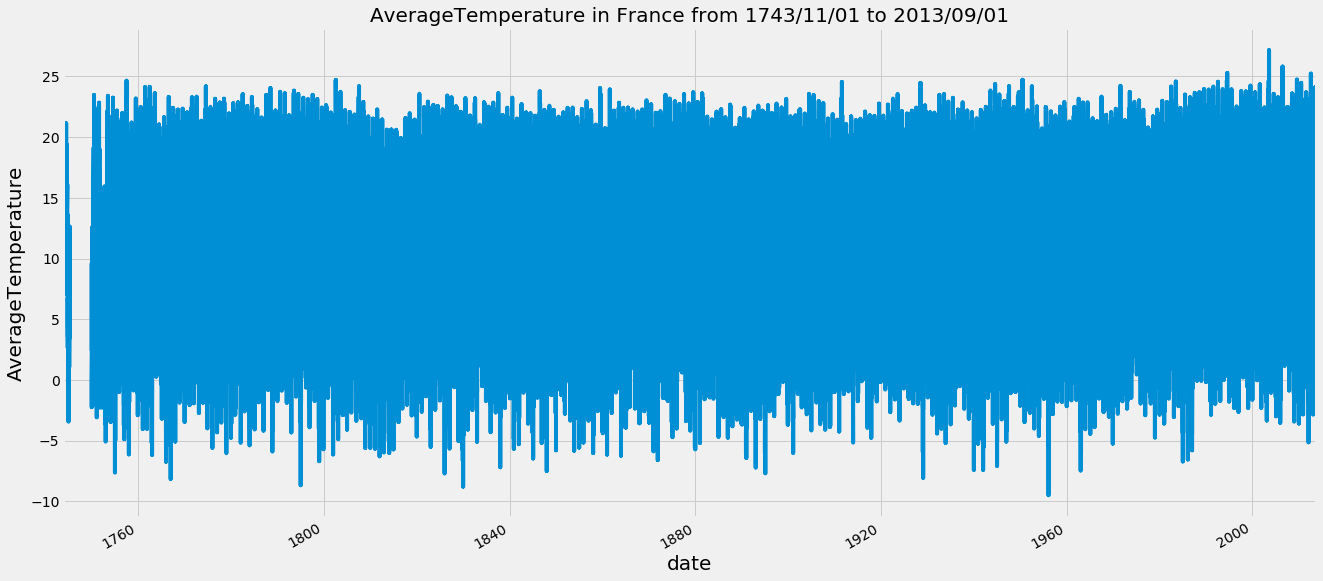

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
df_temp_france.AverageTemperature.plot()
plt.title('AverageTemperature in France from 1743/11/01 to 2013/09/01',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('AverageTemperature',fontsize=20)

In order to have a clear vision of the temperature change, we will reduce the period of time visualised. This operation needs some domain knowledge(like fore example: In which year was a relevant change in temperate along the years ?....)
Since, it's a personal project and I don't have an expertise in enviromental issues, I am going to choose the period between(01-01-1900 and 01-08-2013). This choice is not completly arbitrary, but I referred to the begining of the global warming which was at the begining of XX decade:

In [15]:
df_temp_france.index

DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='date', length=116604, freq=None)

In [16]:
df_temp_france.index.year

Int64Index([1743, 1743, 1744, 1744, 1744, 1744, 1744, 1744, 1744, 1744,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='date', length=116604)

In [17]:
df_temp_fr1 = df_temp_france[(df_temp_france.index.year >= 1900)]

In [18]:
df_temp_fr1

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
date,,,,,,
1900-01-01,3.483,0.630,Aix En Provence,France,44.20N,4.47E
1900-02-01,6.024,0.491,Aix En Provence,France,44.20N,4.47E
1900-03-01,4.528,0.469,Aix En Provence,France,44.20N,4.47E
1900-04-01,9.501,0.304,Aix En Provence,France,44.20N,4.47E
1900-05-01,13.531,0.367,Aix En Provence,France,44.20N,4.47E
...,...,...,...,...,...,...
2013-05-01,10.477,0.406,Villeurbanne,France,45.81N,5.77E
2013-06-01,15.970,0.453,Villeurbanne,France,45.81N,5.77E
2013-07-01,20.531,0.367,Villeurbanne,France,45.81N,5.77E


Text(0, 0.5, 'AverageTemperature')

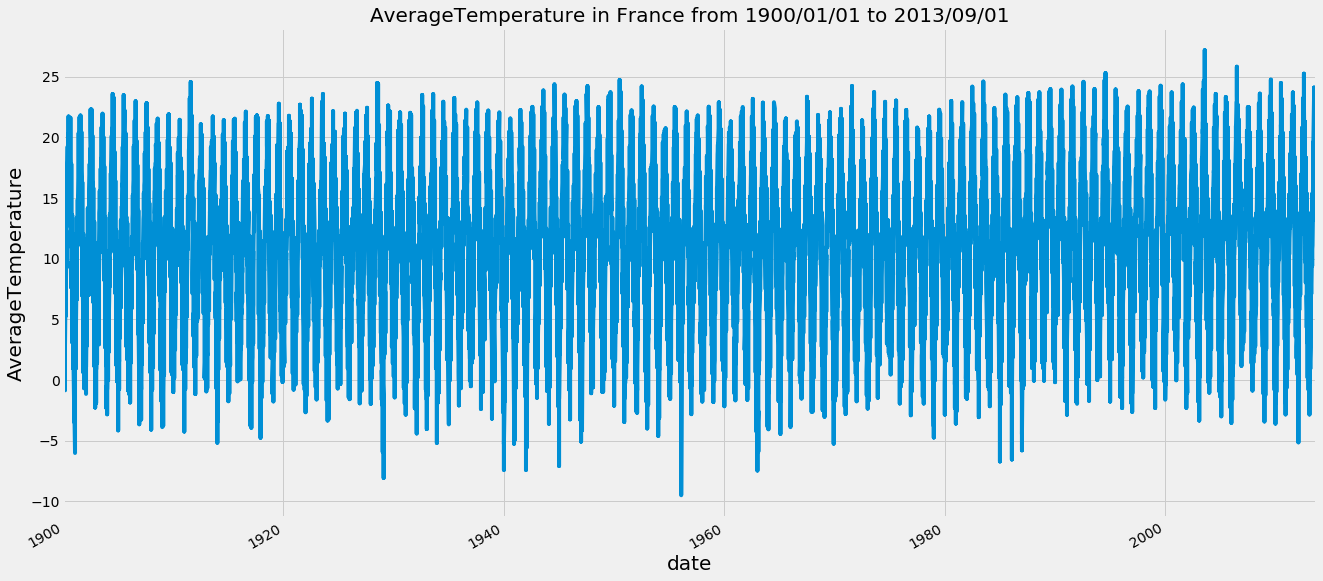

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
df_temp_fr1.AverageTemperature.plot()
plt.title('AverageTemperature in France from 1900/01/01 to 2013/09/01',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('AverageTemperature',fontsize=20)

Let's zoom in to the plot in order to describe the evolution of the data:

In [20]:
temp_monthly = df_temp_fr1.resample("M").mean()

In [21]:
temp_monthly.head()

,AverageTemperature,AverageTemperatureUncertainty
date,,
1900-01-31,3.630472,0.633417
1900-02-28,4.959583,0.634278
1900-03-31,3.657861,0.465611
1900-04-30,8.767722,0.390056
1900-05-31,12.183583,0.334750


Text(0, 0.5, 'AverageTemperature')

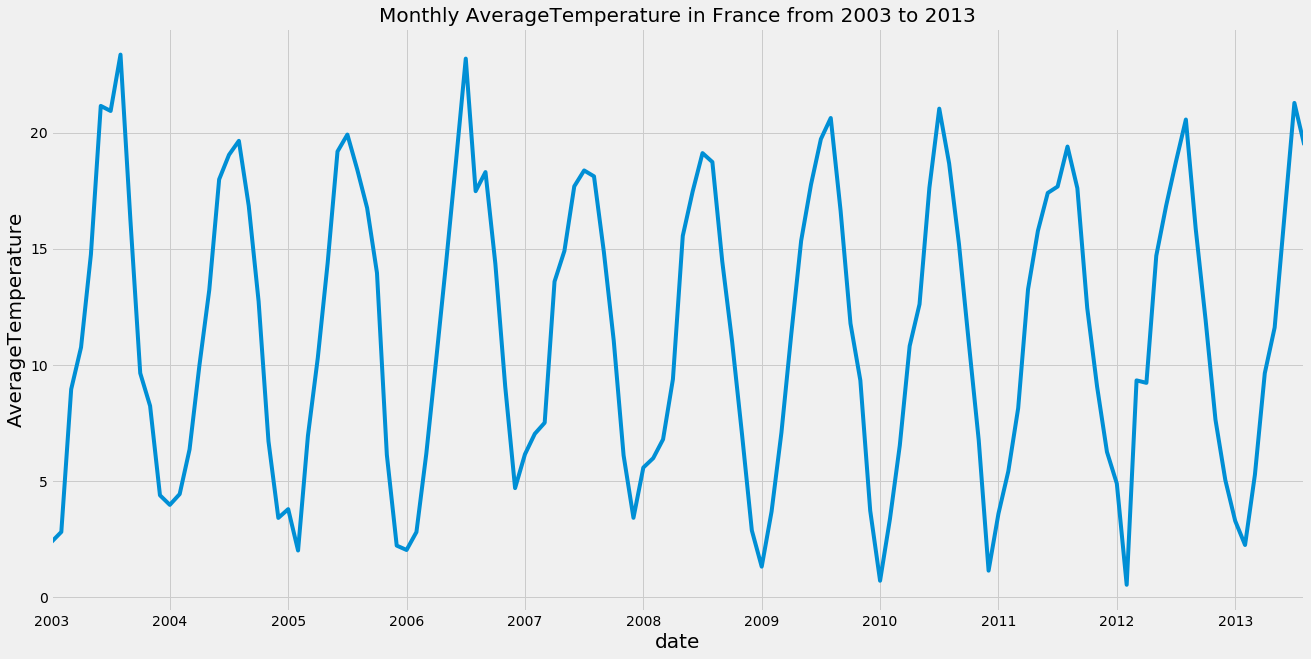

In [22]:
plt.figure(figsize=(20,10))
temp_monthly['2003-01-01':'2013-09-01'].AverageTemperature.plot()
plt.title('Monthly AverageTemperature in France from 2003 to 2013',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('AverageTemperature',fontsize=20)

The data present seasonality with peaks in the middle of each year, which is logical since the temperature reachs its maximum at the summer.

In [23]:
temp_year = df_temp_fr1.resample("Y").mean()
temp_year

,AverageTemperature,AverageTemperatureUncertainty
date,,
1900-12-31,10.602840,0.551662
1901-12-31,9.738926,0.531343
1902-12-31,9.897567,0.513919
1903-12-31,10.144359,0.515398
1904-12-31,10.513250,0.511062
...,...,...
2009-12-31,11.532032,0.253396
2010-12-31,10.452808,0.232301
2011-12-31,12.172301,0.255278


Text(0, 0.5, 'AverageTemperature')

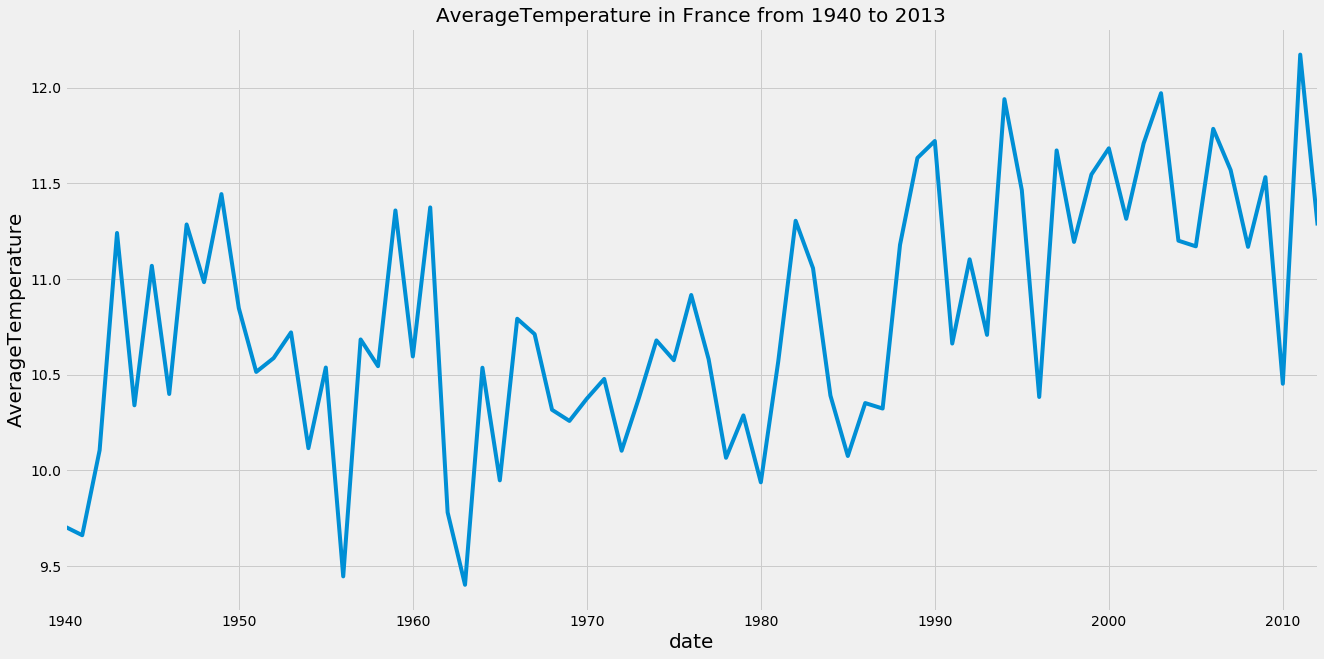

In [24]:
plt.figure(figsize=(20,10))
temp_year['1940-01-01':'2013-09-01'].AverageTemperature.plot()
plt.title('AverageTemperature in France from 1940 to 2013',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('AverageTemperature',fontsize=20)

We notice that there is an upward trend in the data, which was predictable due to the GlobalWarming. Clearly, the data is not stationnary since the mean increases through the years. However we can use The augmented Dickey Fuller Test in order to check the stationnarity.

#### Data cleaining

In [25]:
temperature_France = temp_monthly.drop('AverageTemperatureUncertainty',axis=1)
temperature_France.head()

,AverageTemperature
date,
1900-01-31,3.630472
1900-02-28,4.959583
1900-03-31,3.657861
1900-04-30,8.767722
1900-05-31,12.183583


In [26]:
# check stationarity in time series data of a given city

def check_stationarity(df):
    # method1: plot the time series to check for trend and seasonality
    df.plot(figsize=(10, 10))
    
    # method 2: check if histogram fits a Gaussian Curve, then split data into two parts, calculate means and variances and see if they vary
    df.hist(figsize=(10, 10))
    plt.show()
    
    X = df["AverageTemperature"].values
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
    
    # if corresponding means and variances differ slightly (by less than 10), we consider that the time series might be stationary
    if (abs(mean1-mean2) <= 10 and abs(var1-var2) <= 10):
        print("Time Series may be Stationary, since means and variances vary only slightly.\n")
    else:
        print("Time Series may NOT be Stationary, since means and variances vary significantly.\n")
        
    # method3: statistical test (Augmented Dickey-Fuller statistic)
    print("Performing Augmented Dickey-Fuller Test to confirm stationarity...")
    
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    p = result[1]
    if (p > 0.05):
        print("Time Series is NOT Stationary, since p-value > 0.05")
        df = df.diff()  # differencing to make data stationary
        return False
    else:
        print("Time Series is Stationary, since p-value <= 0.05")
        return True

In [27]:
## the missing data
pd.isnull(temperature_France).sum(axis=0)

AverageTemperature    1
dtype: int64

In [28]:
temperature_France.dropna(inplace=True)

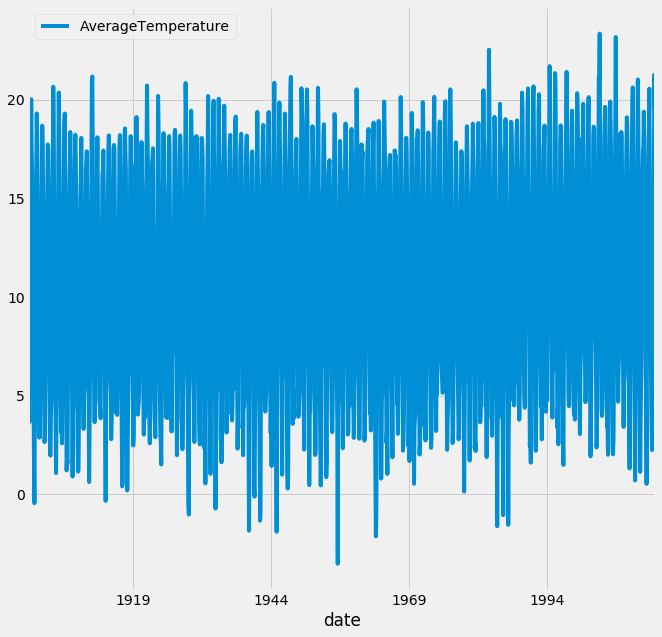

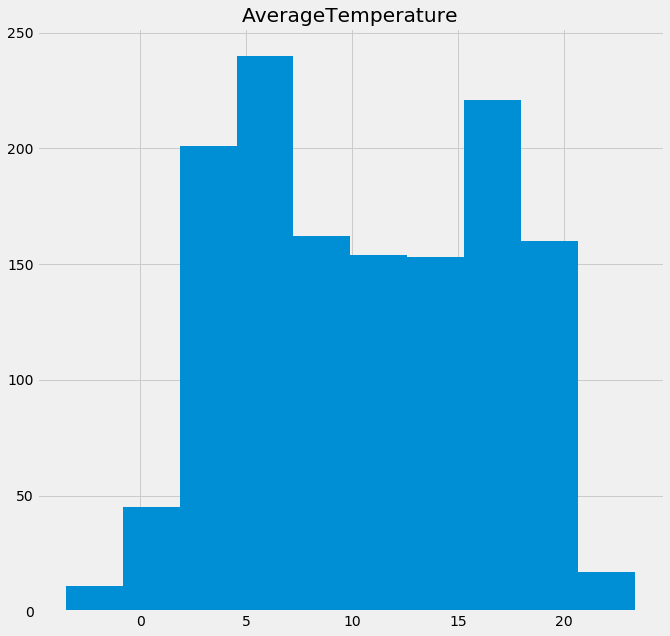

mean1=10.372609, mean2=10.859567
variance1=34.291427, variance2=34.355997
Time Series may be Stationary, since means and variances vary only slightly.

Performing Augmented Dickey-Fuller Test to confirm stationarity...
ADF Statistic: -3.618900
p-value: 0.005410
Time Series is Stationary, since p-value <= 0.05


True

In [29]:
check_stationarity(temperature_France)

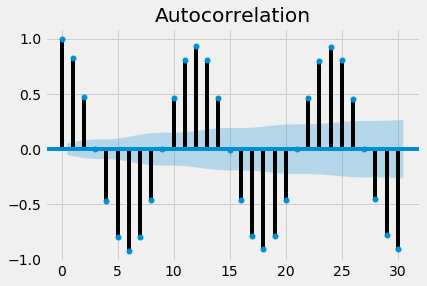

In [30]:
acf_plot = plot_acf(temperature_France,lags=30)

The seasonality feature is clear with a period of 6. Three significant values at **lag=0,1,2** which make us think of an **MA order equal to 2**.

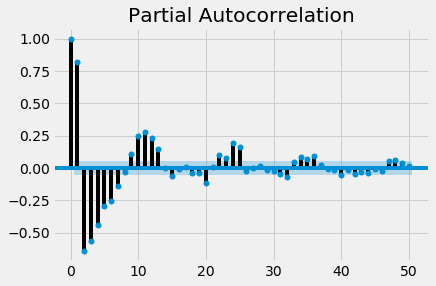

In [31]:
pacf_plot = plot_pacf(temperature_France,lags=50)

We notice significant values at **lags=0,1,2,....,8** which makes us think of **AR** whose order is equal to **7**.

## Model Building

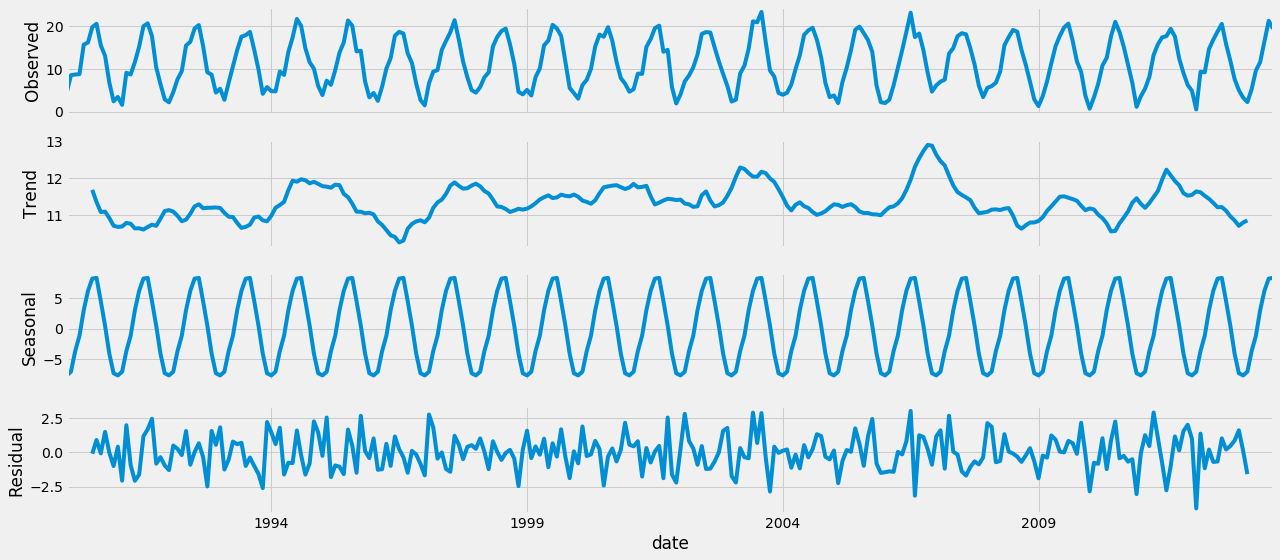

In [32]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = (18, 8)
decomposition = sm.tsa.seasonal_decompose(temperature_France["1990":"2013"], model='additive')
fig = decomposition.plot()
plt.show()

In [35]:
import itertools
d=[0,0]
p = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
P = D = Q = range(0, 2)
seasonal_PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 0) x (0, 1, 0, 12)
SARIMAX: (0, 0, 0) x (0, 1, 1, 12)


In [38]:
for param in pdq:
    for param_seasonal in seasonal_PDQ:
        try:
            mod = sm.tsa.statespace.SARIMAX(temperature_France,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=-1)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10673.677708416344
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9129.789878832697
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5724.169142737929
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4820.520871908722
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5721.2616671134465
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4852.697833028237
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5246.4104912279345
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4822.518257517544
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9149.486939951687
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8089.5575494425275
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5691.915978291788
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4787.1388170441915
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5696.602763787486
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4878.060688079184
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5224.4171671926815
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4789.997519506453
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10673.677708416344
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9129.789878832697
ARI

In [43]:
mod = sm.tsa.statespace.SARIMAX(temperature_France,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5296      0.114      4.626      0.000       0.305       0.754
ma.L1         -0.3707      0.125     -2.972      0.003      -0.615      -0.126
ma.S.L12      -0.9524      0.011    -88.995      0.000      -0.973      -0.931
sigma2         2.0431      0.068     30.127      0.000       1.910       2.176


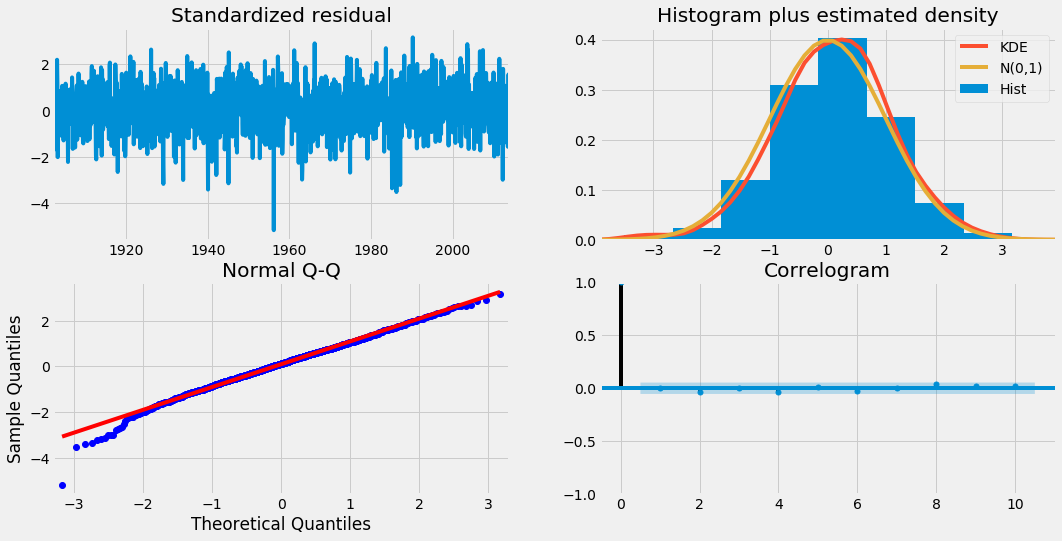

In [44]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

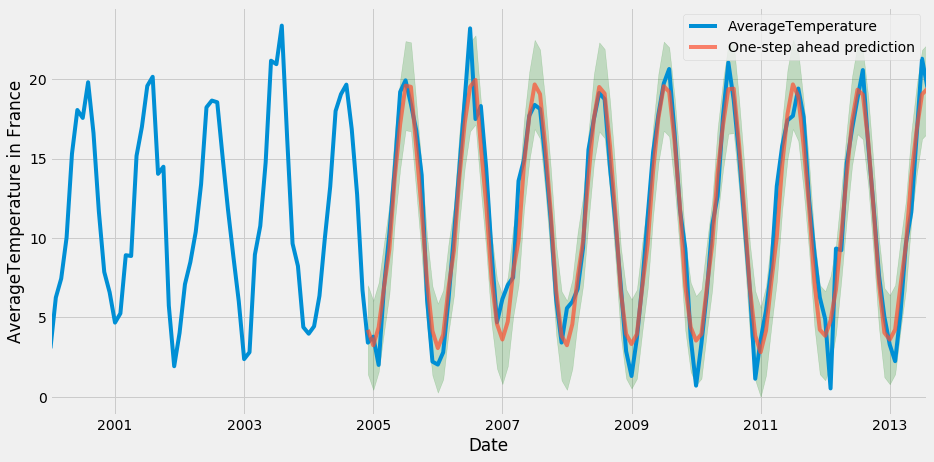

In [118]:
pred = results.get_prediction(start=pd.to_datetime('2004-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = temperature_France['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead prediction', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AverageTemperature in France')
plt.legend()
plt.show()

In [59]:
# fitting an ARIMA model with chosen p, d, q values and calculating the mean squared error
from sklearn.metrics import mean_absolute_error

TempFr_forecasted = pred.predicted_mean
TempFr_Observed = temperature_France['2004-12-31':]
mse = mean_squared_error(TempFr_forecasted, TempFr_Observed)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(TempFr_forecasted, TempFr_Observed)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.194548830413693
Mean Absolute Error: 1.1681973831771095


In [60]:
temperature_France['2004-12-31':].describe()

,AverageTemperature
count,105.000000
mean,11.297582
std,6.147062
min,0.536278
25%,6.131194
50%,11.049750
75%,17.405611
max,23.188194


The Mean Absolute Error is equal approximatly to 1.17 which shows that the model is a good fit to the data, Because the std value is evaluated at 6.14. 

### Forceasting the temperature in France

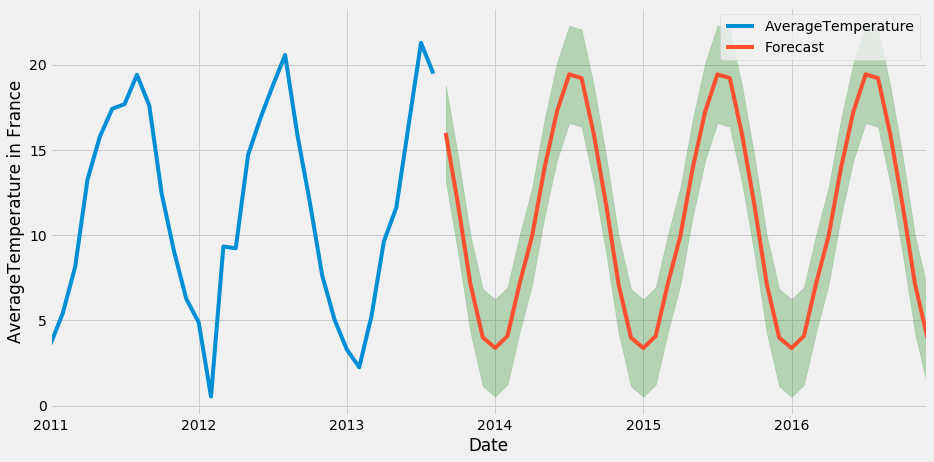

In [117]:
pred_uc = results.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()
ax = temperature_France['2011':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AverageTemperature in France')
plt.legend()
plt.show()

In [114]:
temperature_moyenne2018 = pred_uc.predicted_mean['2015'].values.mean()
print('The average temperature in Freance for the year 2015 is equal to',temperature_moyenne2018.round(2), 'C°')

The mean temperature in 2015 is equal to 11.09 C°


According to the statistics for the year 2015 the average temperature was equal to **13.6 C°**. The model calculates an AverageTemperature evaluated a **11.09 C°** which deviates by **2.5 C°** from the real value. That's is to be considered as a pretty good estimation.